In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
from scipy import signal
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from skimage import data
import time

plt.gray()
%matplotlib inline

In [2]:
im = data.camera().astype(np.float32) / 255

In [45]:
def fft_convolve(im, ker):
    pad_ker = np.zeros_like(im, dtype=np.float32)
    si = 0
    fudge_factor = 2*(max(ker.shape)-1)
    pad_ker[si:si+ker.shape[0], si:si+ker.shape[1]] = ker
    fft_ker = np.fft.rfft2(np.pad(pad_ker, ((0, fudge_factor), (0, fudge_factor)), 'constant'))
    fft_im = np.fft.rfft2(np.pad(im, fudge_factor//2, 'constant'))
    return np.fft.irfft2(fft_ker * fft_im)[fudge_factor: -fudge_factor//2, fudge_factor:-fudge_factor//2]

In [3]:
fs = 31
ker = np.ones((fs, fs)) / fs**2
sker = np.ones(fs) / fs

MSE=1.44e-10


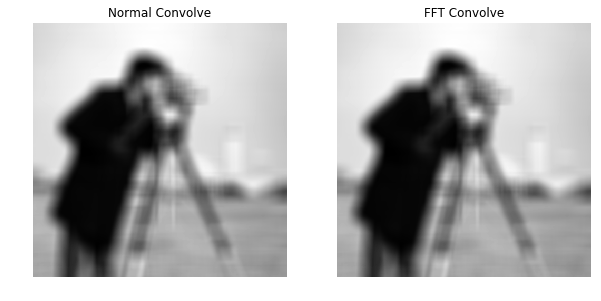

In [26]:
# Compute by convolution, circular boundaries
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
blur_im = signal.convolve2d(im, ker, mode='valid')
ax.imshow(blur_im)
ax.set_title('Normal Convolve')
ax.axis('off')

ax = plt.subplot(1, 2, 2)
res = fft_convolve(im, ker)
ax.imshow(res)
ax.set_title('FFT Convolve')
ax.axis('off')
print('MSE=%.2e'%(((res - blur_im)**2).sum()))

In [46]:
# Time different methods
fss = np.arange(1, 32)
normal_times = []
for fs in fss:
    k = np.ones((fs, fs))
    start = time.time()
    signal.convolve2d(im, k, mode='valid')
    end = time.time()
    normal_times.append(end-start)
fft_times = []
for fs in fss:
    k = np.ones((fs, fs))
    start = time.time()
    fft_convolve(im, k)
    end = time.time()
    fft_times.append(end-start)

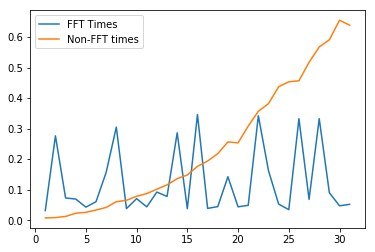

In [47]:
plt.plot(fss, fft_times, label='FFT Times')
plt.plot(fss, normal_times, label='Non-FFT times')
plt.legend(loc='best')